## Final Project Submission

Please fill out:
* Student name: LISA KERUBO
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 29-07-2024
* Instructor name: SAMWEL JANE
* Blog post URL:


# BUSINESS PROBLEM
Microsoft would like to join all the big companies in creating original video content. Microsoft would like to create a new movie studio but does not have a pre-existing knowledge on movie creation. We have been charged with the task of assisting them acquire the required knowledge to kickstart their business.




# PROJECT OVERVIEW
For Microsoft to embark on this journey of movie creation, they need to have industry knowledge. This involves exploring and understanding films that are currently doing well at the box office. The aim of this project is to explore the various types of movies doing great in the market and translate the findings into actionable insights that Microsoft can use, to help decide the type of films to create.

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Files Used


*   imdb.title.basics
*   imdb.title.ratings





In [2]:
#import the files
#import the imdb.title.basics file and name it df1 dataset
df1 = pd.read_csv('/content/imdb.title.basics.csv.gz')
#display first seven rows
df1.head(7)



,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"


In [3]:
#import the second file imdb.title.ratings and name it df2
df2 = pd.read_csv('/content/imdb.title.ratings.csv.gz')
#display last seven rows
df2.head(7)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613


# Information about our datasets

In [4]:
print(df1.info())
print(df1.shape)

print(df2.info())
print(df2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
(146144, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None
(73856, 3)


# Merging the datasets
The two datasets, df1 and df2 can be merged to make the work cleaner. If we have a common key we can merge the datasets.


In [5]:
#merge df1 and df2
df1_and_df2= df1.merge(df2, on='tconst',)
#display first seven rows
df1_and_df2.head(7)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [6]:
#Access column labels of the data
df1_and_df2.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

# Cleaning the data
Cleaning of data ensures the good quality and reliability of our analysis. There are various methods of cleaning data. These include: Handling missing values, handling duplicates, standardizing data, removing unnecessary columns, renaming columns etc.

In [7]:
#Checking for null values
df1_and_df2.isnull().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [8]:
#Handling the null values : Replace null values with hyphen
df1_and_df2.fillna('-', inplace=True)
#Checking whether the required changes have been made
df1_and_df2.isnull().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [9]:
#checking for duplicates
df1_and_df2.duplicated().sum()

0

In [10]:
#Standardizing the data : Change the column names to upper case
df1_and_df2.columns = df1_and_df2.columns.str.upper()
df1_and_df2.columns


Index(['TCONST', 'PRIMARY_TITLE', 'ORIGINAL_TITLE', 'START_YEAR',
       'RUNTIME_MINUTES', 'GENRES', 'AVERAGERATING', 'NUMVOTES'],
      dtype='object')

In [11]:
#Checking whether the changes have been made
df1_and_df2.head()


,TCONST,PRIMARY_TITLE,ORIGINAL_TITLE,START_YEAR,RUNTIME_MINUTES,GENRES,AVERAGERATING,NUMVOTES
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,-,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [12]:
#Removing unnecessary columns
df1_and_df2.drop(['ORIGINAL_TITLE', 'START_YEAR', 'RUNTIME_MINUTES'], axis=1, inplace=True)
df1_and_df2.head()

,TCONST,PRIMARY_TITLE,GENRES,AVERAGERATING,NUMVOTES
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119


In [13]:
#Renaming columns
df1_and_df2.rename(columns={'AVERAGERATING': 'AVERAGE_RATING', 'PRIMARY_TITLE': 'MOVIE_TITLE', 'NUMVOTES': 'NUM_VOTES'}, inplace=True)
df1_and_df2.head()


,TCONST,MOVIE_TITLE,GENRES,AVERAGE_RATING,NUM_VOTES
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119


In [14]:
#Editing specific values in Genres column
df1_and_df2['GENRES'] = df1_and_df2['GENRES'].str.replace(' ' , '')

df1_and_df2=df1_and_df2[df1_and_df2['GENRES'].apply(lambda x: isinstance(x, str))]
df1_and_df2.head()
#

,TCONST,MOVIE_TITLE,GENRES,AVERAGE_RATING,NUM_VOTES
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119


# Data Exploration
To get a quick overview of our new dataset after merging and cleaning.

In [15]:
#Show first five rows of the dataset
df1_and_df2.head()


,TCONST,MOVIE_TITLE,GENRES,AVERAGE_RATING,NUM_VOTES
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119


In [16]:
#Show last three rows of the dataset
df1_and_df2.tail(3)

,TCONST,MOVIE_TITLE,GENRES,AVERAGE_RATING,NUM_VOTES
73853,tt9914642,Albatross,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,-,6.6,5
73855,tt9916160,Drømmeland,Documentary,6.5,11


In [17]:
print(df1_and_df2.info())
print(df1_and_df2.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TCONST          73856 non-null  object 
 1   MOVIE_TITLE     73856 non-null  object 
 2   GENRES          73856 non-null  object 
 3   AVERAGE_RATING  73856 non-null  float64
 4   NUM_VOTES       73856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB
None
(73856, 5)


In [18]:
#Getting summary statistics
print(df1_and_df2.describe())

       AVERAGE_RATING     NUM_VOTES
count    73856.000000  7.385600e+04
mean         6.332729  3.523662e+03
std          1.474978  3.029402e+04
min          1.000000  5.000000e+00
25%          5.500000  1.400000e+01
50%          6.500000  4.900000e+01
75%          7.400000  2.820000e+02
max         10.000000  1.841066e+06


In [19]:
#Checking column labels of the cleaned dataset
df1_and_df2.columns


Index(['TCONST', 'MOVIE_TITLE', 'GENRES', 'AVERAGE_RATING', 'NUM_VOTES'], dtype='object')

# Data Analysis


In [20]:
#Identifying the lowest rating
df1_and_df2['AVERAGE_RATING'].min()


1.0

In [21]:
#Counting number of movies with the lowest rating
df1_and_df2.loc[df1_and_df2['AVERAGE_RATING'] == df1_and_df2['AVERAGE_RATING'].min()].count()

TCONST            65
MOVIE_TITLE       65
GENRES            65
AVERAGE_RATING    65
NUM_VOTES         65
dtype: int64

In [22]:
#Identifying the highest rating
df1_and_df2['AVERAGE_RATING'].max()

10.0

In [23]:
#Counting number of movies with the highest rating
df1_and_df2.loc[df1_and_df2['AVERAGE_RATING'] == df1_and_df2['AVERAGE_RATING'].max()].count()

TCONST            16
MOVIE_TITLE       16
GENRES            16
AVERAGE_RATING    16
NUM_VOTES         16
dtype: int64

In [24]:
#Showing movies with the lowest rating
df1_and_df2[df1_and_df2['AVERAGE_RATING'] == df1_and_df2['AVERAGE_RATING'].min()]

,TCONST,MOVIE_TITLE,GENRES,AVERAGE_RATING,NUM_VOTES
5505,tt1611056,Hito no sabaku,Drama,1.0,449
12557,tt1870432,Kamifûsen,Drama,1.0,489
12618,tt1872215,Tunnel Rendez-vous,Comedy,1.0,125
13053,tt1896768,Kikkake wa You!,"Drama,Music",1.0,21
13502,tt1926214,A Moment of Youth,"Adventure,Biography,Comedy",1.0,352
...,...,...,...,...,...
70815,tt8446392,La Scelta Impossibile,Drama,1.0,5
71345,tt8654080,Overdose of Gore: Crime born Crime,Horror,1.0,21
72303,tt9005484,Roofied: The Lethal Dose,Drama,1.0,112
73081,tt9352262,The Defender,Drama,1.0,16


In [25]:
#Showing movies with the highest rating
df1_and_df2[df1_and_df2['AVERAGE_RATING'] == df1_and_df2['AVERAGE_RATING'].max()]

,TCONST,MOVIE_TITLE,GENRES,AVERAGE_RATING,NUM_VOTES
702,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,10.0,5
878,tt10378660,The Dark Knight: The Ballad of the N Word,"Comedy,Drama",10.0,5
9745,tt1770682,Freeing Bernie Baran,"Crime,Documentary",10.0,5
27335,tt2632430,Hercule contre Hermès,Documentary,10.0,5
42970,tt4109192,I Was Born Yesterday!,Documentary,10.0,6
49925,tt4944240,Dog Days in the Heartland,Drama,10.0,5
50085,tt4960818,Revolution Food,Documentary,10.0,8
51109,tt5089804,Fly High: Story of the Disc Dog,Documentary,10.0,7
53408,tt5344358,All Around Us,Documentary,10.0,6
53689,tt5390098,The Paternal Bond: Barbary Macaques,Documentary,10.0,5


Using the NUMVOTES column to identify the most popular movie.

In [26]:
#identifying highest number of votes
df1_and_df2['NUM_VOTES'].max()


1841066

In [27]:
#Showing the highest voted movie
df1_and_df2.loc[df1_and_df2['NUM_VOTES']==1841066]

,TCONST,MOVIE_TITLE,GENRES,AVERAGE_RATING,NUM_VOTES
2387,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8,1841066


In [28]:
#identifying the highest voted genre
most_streamed_genre = df1_and_df2.groupby('GENRES')['NUM_VOTES'].sum().idxmax()
print(most_streamed_genre)

Action,Adventure,Sci-Fi


Using NUM_VOTES column to identify the least popular movie

In [29]:
#identifying lowest number of votes
df1_and_df2['NUM_VOTES'].min()

5

In [30]:
#identifying the lowest voted movies
df1_and_df2.loc[df1_and_df2['NUM_VOTES']==5]

,TCONST,MOVIE_TITLE,GENRES,AVERAGE_RATING,NUM_VOTES
22,tt0276568,To Chase a Million,"Action,Drama",7.4,5
315,tt0844699,Ivan Mosjoukine ou L'enfant du carnaval,Documentary,9.0,5
522,tt10009602,Meu Nome é Daniel,Documentary,8.0,5
523,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,Documentary,7.0,5
527,tt10011252,Watson,Documentary,6.0,5
...,...,...,...,...,...
73832,tt9899880,Columbus,Comedy,5.8,5
73837,tt9903952,BADMEN with a good behavior,"Comedy,Horror",9.2,5
73844,tt9905796,July Kaatril,Romance,9.0,5
73850,tt9913056,Swarm Season,Documentary,6.2,5


In [31]:
#Identifying number of movies that have the least votes
df1_and_df2.loc[df1_and_df2['NUM_VOTES']==5].count()

TCONST            2699
MOVIE_TITLE       2699
GENRES            2699
AVERAGE_RATING    2699
NUM_VOTES         2699
dtype: int64

In [32]:
#identifying the least streamed genre
least_streamed_genre = df1_and_df2.groupby('GENRES')['NUM_VOTES'].sum().idxmin()
print(least_streamed_genre)

Action,Crime,Musical


In [33]:
#showing the least streamed genre
df1_and_df2.loc[df1_and_df2['GENRES'] == least_streamed_genre]

,TCONST,MOVIE_TITLE,GENRES,AVERAGE_RATING,NUM_VOTES
15103,tt2006036,1 911 Jak Boyz,"Action,Crime,Musical",4.4,5


In [34]:
#grouping data by genres and average rating
df1_and_df2.groupby('GENRES')['AVERAGE_RATING'].mean()

GENRES
-                             6.496144
Action                        5.757712
Action,Adult,Comedy           4.650000
Action,Adventure              5.223529
Action,Adventure,Animation    6.562874
                                ...   
Thriller                      5.704244
Thriller,War                  5.650000
Thriller,Western              7.150000
War                           6.134043
Western                       5.037333
Name: AVERAGE_RATING, Length: 924, dtype: float64

In [35]:
#grouping data by genres and number of votes
df1_and_df2.groupby('GENRES')['NUM_VOTES'].mean()

GENRES
-                                24.574627
Action                          336.115424
Action,Adult,Comedy              18.000000
Action,Adventure               1603.102941
Action,Adventure,Animation    21380.497006
                                  ...     
Thriller                        283.320900
Thriller,War                   1791.500000
Thriller,Western               3322.000000
War                             117.765957
Western                         207.613333
Name: NUM_VOTES, Length: 924, dtype: float64

# Data Visualization
Data Visualization is the graphical representation of information and data. Visualizations enable users to understand trends, outliers and patterns in data. It allows easier data interpretation and better decision making.
For microsoft to understand the movie industry better, the visualizations come in handy.


Since our dataset is large, sampling the data would allow us come up with a more reasonable plot. Sampling the data simply means picking a random sample of the data.

In [36]:
df1_and_df2.shape

(73856, 5)

In [37]:
#Selecting a sample of ten
df1_and_df2_sample = df1_and_df2.sample(n=20,random_state=42)
df1_and_df2_sample

,TCONST,MOVIE_TITLE,GENRES,AVERAGE_RATING,NUM_VOTES
7780,tt1702441,The Big Uneasy,Documentary,7.4,125
60830,tt6304978,The Undone,Horror,3.6,16
47174,tt4597882,Proud to Be a Sikh,Drama,7.2,18
40249,tt3822210,The Z-Nail Gang,"Action,Comedy,Drama",8.2,25
56011,tt5707090,Digital Edition,"Documentary,History",7.7,50
13774,tt1937116,Career Courier: The Labor of Love,"Action,Documentary,Sport",7.3,9
63626,tt6801218,Nighthawks,"Drama,Thriller",8.6,19
59727,tt6164698,The Heart,Drama,5.6,230
46792,tt4552298,Killing for Love,"Crime,Documentary,Romance",7.1,1180
14858,tt1991009,Between Shadows and Whispers,"Biography,Documentary,Drama",7.8,9


In [38]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

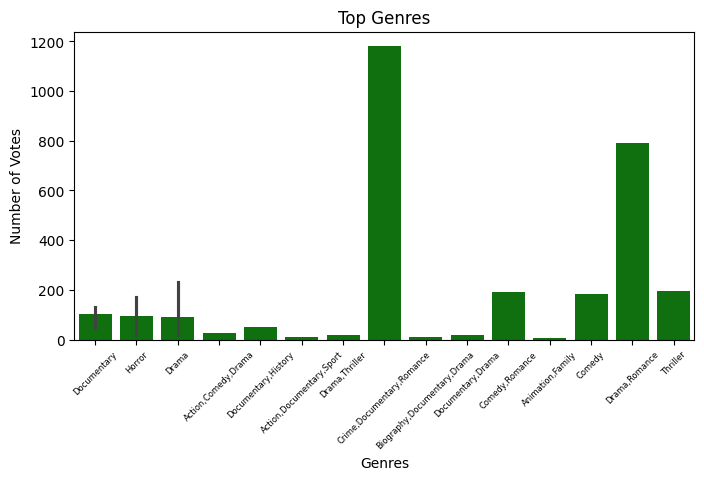

In [39]:
#Bar graph of top genres based on number of votes
#plot graph
plt.figure(figsize=(8, 4))
sns.barplot(x= 'GENRES', y='NUM_VOTES', data=df1_and_df2_sample, color='green')

plt.title('Top Genres')
plt.xlabel('Genres', fontsize=10)
plt.ylabel('Number of Votes', fontsize=10)
plt.xticks(rotation=45, fontsize=6)
plt.show()



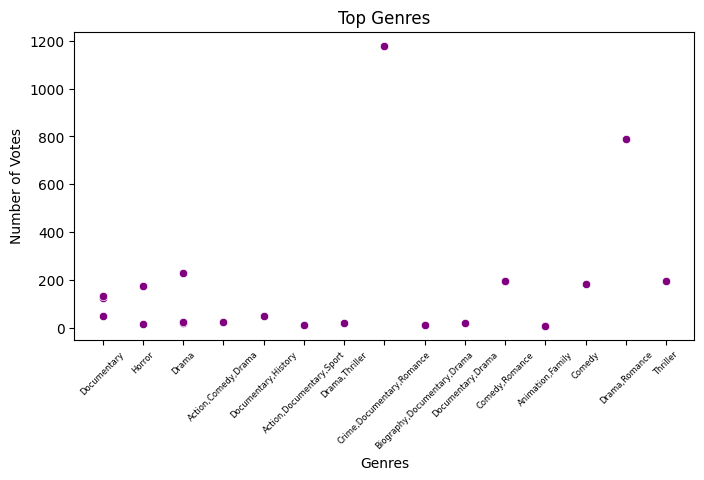

In [40]:
#Scatter plot of top genres based on number of votes
plt.figure(figsize=(8, 4))
sns.scatterplot(x='GENRES', y='NUM_VOTES', data=df1_and_df2_sample, color='purple')

#Adjusting font size of x-axis labels
plt.xticks(rotation=45,ha='center',fontsize=6)
plt.title('Top Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Votes')
plt.show()


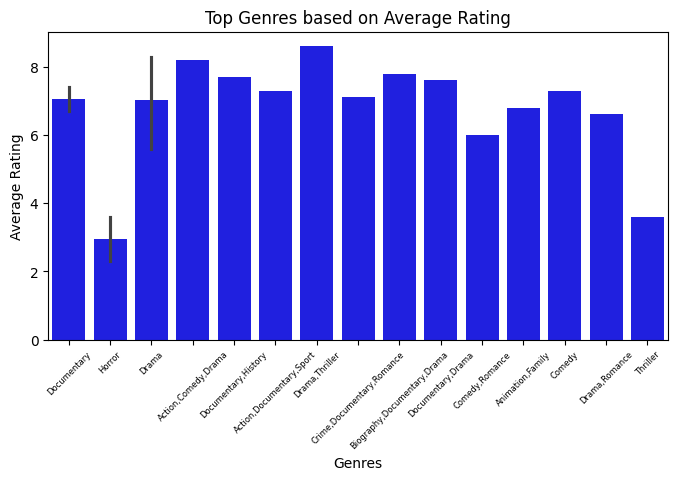

In [41]:
#Bar graph of top genres based on average rating
plt.figure(figsize=(8, 4))
sns.barplot(x= 'GENRES', y='AVERAGE_RATING', data=df1_and_df2_sample, color='blue')
plt.title('Top Genres based on Average Rating')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, fontsize=6)
plt.show()

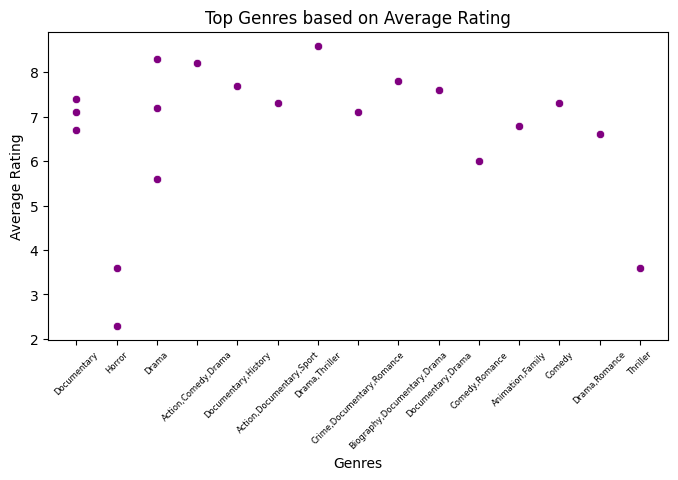

In [42]:
#Scatter plot of top genres based on average rating
plt.figure(figsize=(8, 4))
sns.scatterplot(x= 'GENRES', y='AVERAGE_RATING', data=df1_and_df2_sample, color='purple')
plt.title('Top Genres based on Average Rating')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, fontsize=6)
plt.show()

Identifying and handling outliers


In [43]:

#Calculating lower quartile (Q1) and upper quartile (Q3)
Q1 = df1_and_df2['AVERAGE_RATING'].quantile(0.25)
Q3 = df1_and_df2['AVERAGE_RATING'].quantile(0.75)
#Calculating interquartile range (IQR)
IQR = Q3 - Q1
#Calculating lower bound and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Identifying outliers
outliers = df1_and_df2[(df1_and_df2['AVERAGE_RATING'] < lower_bound) | (df1_and_df2['AVERAGE_RATING'] > upper_bound)]
print(outliers)



           TCONST                    MOVIE_TITLE                    GENRES  \
16      tt0249516                     Foodfight!   Action,Animation,Comedy   
321     tt0847215                        Neowolf           Horror,Thriller   
431     tt0937353             The Devil's Flower           Mystery,Romance   
513     tt0996958       Legend of the Red Reaper  Action,Adventure,Fantasy   
608    tt10078894              Deadly Playthings                    Horror   
...           ...                            ...                       ...   
73722   tt9806304                        Klubare        Comedy,Crime,Music   
73729   tt9811798  0009: The Sharks Make Contact  Animation,Comedy,Musical   
73747   tt9824016  Roy Kiyoshi: The Untold Story                    Horror   
73778   tt9854638                Mamá al volante                    Comedy   
73839   tt9904820          American Terror Story                    Horror   

       AVERAGE_RATING  NUM_VOTES  
16                1.9       

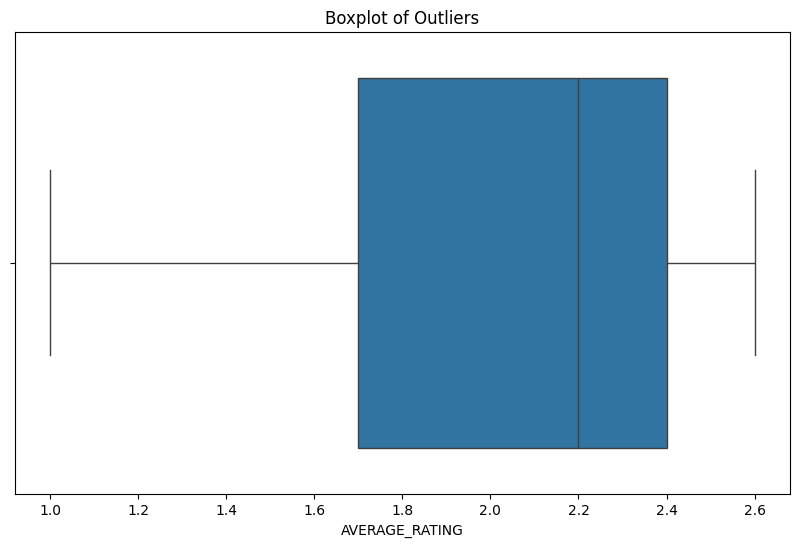

In [44]:
#Boxplot showing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=outliers['AVERAGE_RATING'])
plt.title('Boxplot of Outliers')
plt.show()

# Conclusion

1.   The lowest movie rating  was 1.0
2.   Number of movies with the lowest rating was 65
3.   The highest movie rating was 10.0
4.   Number of movies with the highest rating was 16
5.   The most popular movie based on number of votes was Inception with 1841066 votes, an Action, Adventure and Sci-fi movie.
6.   The lowest number of votes for a movie was 5.
7.   Number of movies with the lowest number of votes was 2699.
8.   The top genre based on number of votes taken out of a sample of 10 genres was Comedy, Crime and Romance with 1071 votes.
9.   The least streamed genre was Action, Crime and Musical.





We can use the number of votes to identify the most popular movies and genres since number of votes indicates the number of people who have watched and enjoyed the movie.

# Recommendations


*   From the analysis the ideal genre to focus on would be Action, Adventure and Sci-fi based on most popular movie.
*  Other top ideal genres to focus on would be Documentaries, Drama,and Comedy based on rating.
*   I'd recommend borrowing ideas from the Inception movie.
*   Focus on targeting high ratings and high number of votes.





